In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
    
import sys
sys.path.insert(0, '/home/dhruv/codebase/pyLDLE2/')

In [2]:
import numpy as np
from pyLDLE2 import util_, visualize_, datasets, buml_
from scipy.sparse import coo_matrix
from scipy import optimize
from scipy.special import erf, erfinv
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.sparse.linalg import svds
import bx_util

matplotlib.get_backend() =  module://ipympl.backend_nbagg


In [3]:
vis = visualize_.Visualize()

In [4]:
ex_name = 'figures/noiseless_torus_high_amb'

In [5]:
X0_, labelsMat0_, ddX0 = datasets.Datasets().curvedtorus3d(n=8000, noise=0)

X.shape =  (8000, 3)


In [6]:
thresh = 0.18
mask = X0_[:,0] < thresh
X0 = X0_[mask,:]
labelsMat0 = labelsMat0_[mask,:]
dX = X0[:,0] > thresh-0.01
sp_dist0 = util_.shortest_paths(X0, 5, return_predecessors=False)
ddX = np.min(sp_dist0[dX,:], axis=0)

In [7]:
m=2000
np.random.seed(42)
O_rand, _, _ = svds(np.random.normal(0,1,(m,3+1)), 3)
#O_rand = np.eye(3)
X_ = X0.dot(O_rand.T)

In [8]:
theta = labelsMat0[:,0]

In [9]:
X=X_

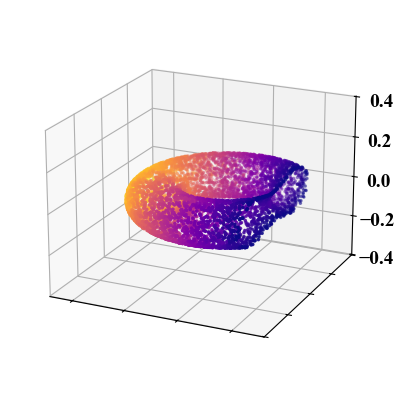

In [10]:
vis.data(X.dot(O_rand), ddX, cmap='plasma', figsize=(4,4), s=10, elev=20, azim=-65, title=None)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.savefig(ex_name + '.pdf', dpi=400)

In [11]:
np.sum(np.abs(X0 - X.dot(O_rand)))

9.680541128231175e-13

In [12]:
np.sum(np.abs(X - X.dot(O_rand).dot(O_rand.T)))

2.4828514848165036e-11

In [13]:
labelsMat = labelsMat0

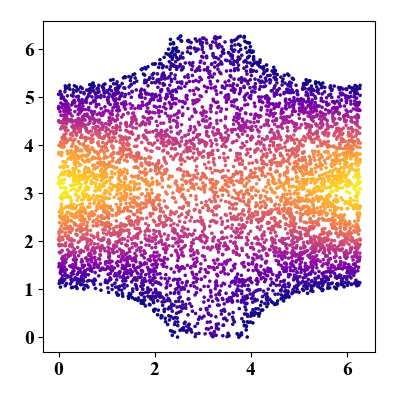

In [14]:
vis.data(labelsMat, ddX, cmap='plasma', figsize=(4,4), s=10, title=None)
plt.savefig(ex_name + '_domain.pdf', dpi=400)

In [16]:
max_prctile

8.307642381956839

In [17]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = None
opts['d'] = 2
bx_ds, bx_init_ds, W_ds, D_ds, nu_norm_ds = bx_util.estimate_bx(X, opts=opts)

Error: 0.012230730251092226
Error: 0.0012834249396864728
Error: 0.0001443623448371678
Error: 1.6757834561564877e-05
Error: 1.9692429417128565e-06
Error: 2.3320008679661441e-07
Error: 2.7767087740215857e-08
Error: 3.3199416549223315e-09
Error: 3.9826686393240607e-10
Error: 4.8011150610705045e-11
Error: 5.950573367385914e-12
Error: 7.384093336781916e-13
Error: 9.237055564881302e-14
Error: 1.2101430968414206e-14
Error: 2.220446049250313e-15
Error: 6.661338147750939e-16
Sinkhorn converged at iter: 16
Error at iter: 0 is: 0.10291317156698432
newton method converged at iter: 8


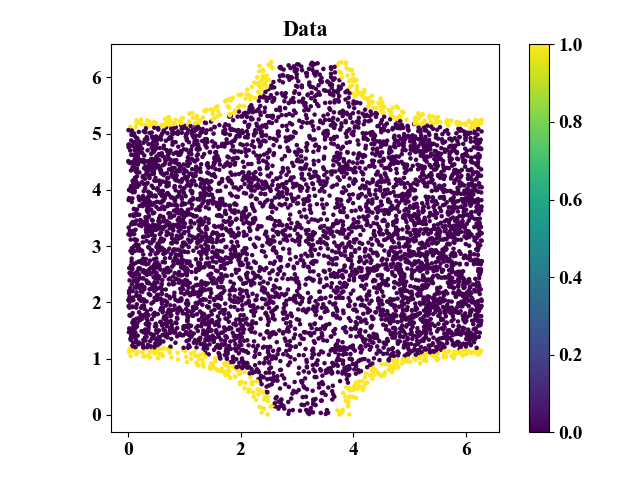

In [18]:
vis.data(labelsMat, bx_ds<np.percentile(bx_ds, max_prctile), cmap='viridis', colorbar=True)
plt.show()

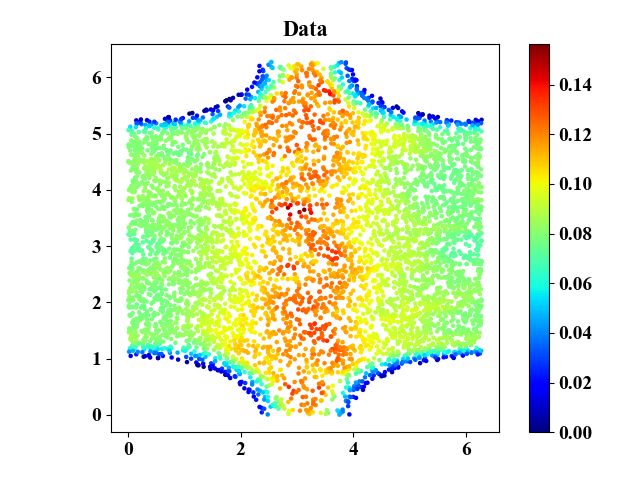

In [19]:
vis.data(labelsMat, bx_ds, cmap='jet', colorbar=True)

In [20]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = 'local_pca'
opts['d'] = 2
bx_ds_lpca, bx_init_ds_lpca, W_ds_lpca, D_ds_lpca, nu_norm_ds_lpca = bx_util.estimate_bx(X, opts=opts)

Error: 0.012230730251092226
Error: 0.0012834249396864728
Error: 0.0001443623448371678
Error: 1.6757834561564877e-05
Error: 1.9692429417128565e-06
Error: 2.3320008679661441e-07
Error: 2.7767087740215857e-08
Error: 3.3199416549223315e-09
Error: 3.9826686393240607e-10
Error: 4.8011150610705045e-11
Error: 5.950573367385914e-12
Error: 7.384093336781916e-13
Error: 9.237055564881302e-14
Error: 1.2101430968414206e-14
Error: 2.220446049250313e-15
Error: 6.661338147750939e-16
Sinkhorn converged at iter: 16
Error at iter: 0 is: 0.10679143596980578
newton method converged at iter: 16


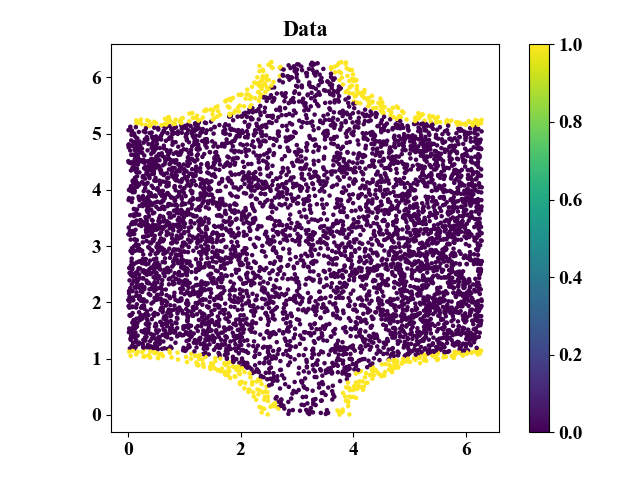

In [21]:
vis.data(labelsMat, bx_ds_lpca<np.percentile(bx_ds_lpca, max_prctile), cmap='viridis', colorbar=True)
plt.show()

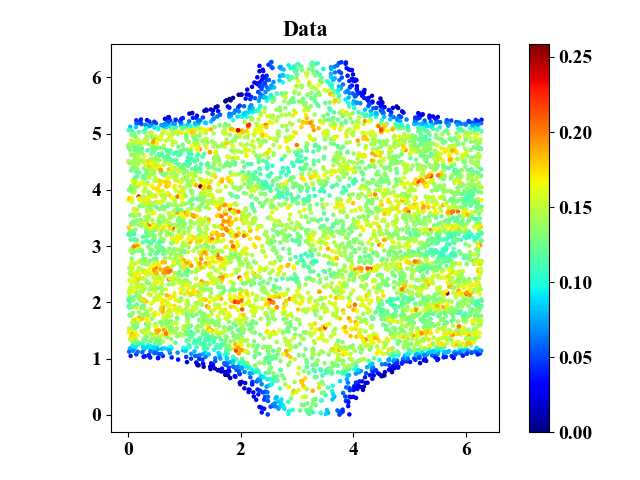

In [22]:
vis.data(labelsMat, bx_ds_lpca, cmap='jet', colorbar=True)

In [23]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = 'local_pca'
bx_berry_sauer_w_lpca, bx_berry_sauer_init_w_lpca, nu_norm_berry_sauer_w_lpca = bx_util.estimate_bx_berry_and_sauer(X, opts=opts)

Error at iter: 0 is: 0.08841310566002289
newton method converged at iter: 4


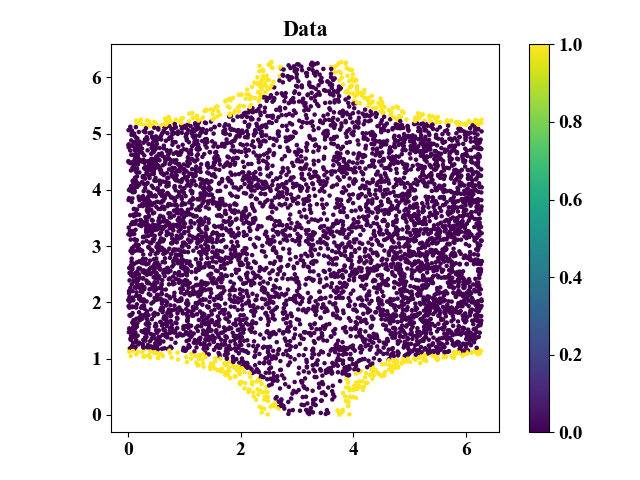

In [24]:
vis.data(labelsMat, bx_berry_sauer_w_lpca<np.percentile(bx_berry_sauer_w_lpca, max_prctile), cmap='viridis', colorbar=True)

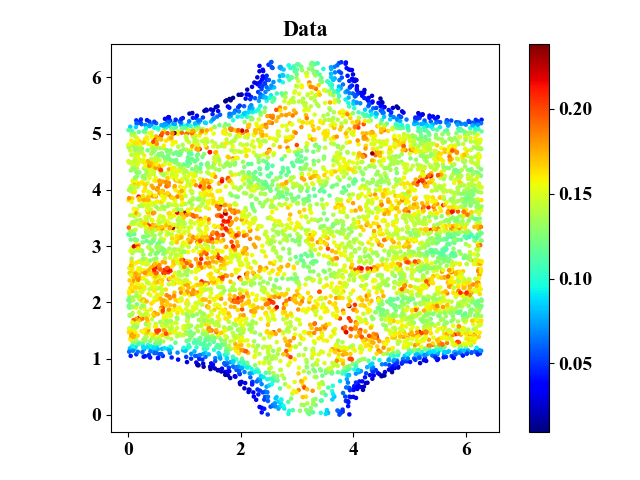

In [25]:
vis.data(labelsMat, bx_berry_sauer_w_lpca, cmap='jet', colorbar=True)

In [26]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
bx_berry_sauer, bx_berry_sauer_init, nu_norm_berry_sauer = bx_util.estimate_bx_berry_and_sauer(X, opts=opts)

Error at iter: 0 is: 0.08858670043543386
newton method converged at iter: 4


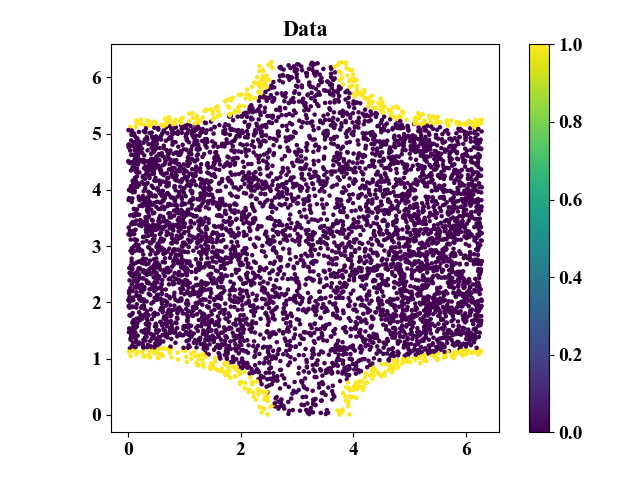

In [27]:
vis.data(labelsMat, bx_berry_sauer<np.percentile(bx_berry_sauer, max_prctile), cmap='viridis', colorbar=True)

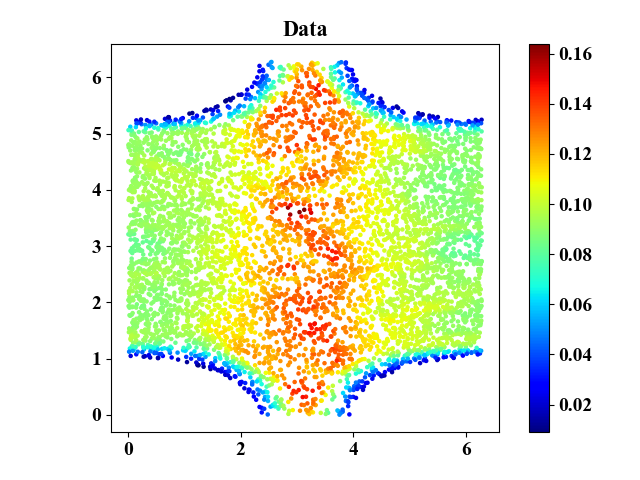

In [28]:
vis.data(labelsMat, bx_berry_sauer, cmap='jet', colorbar=True)

In [29]:
prctiles = np.arange(2, 12, 1)
jac_ind_bs_lpca = []
jac_ind_bs = []
jac_ind_ds_lpca = []
jac_ind_ds = []

for prctile in prctiles:
    jac_ind_ds_lpca.append(bx_util.compute_jaccard_index(ddX, bx_ds_lpca, prctile))
    jac_ind_ds.append(bx_util.compute_jaccard_index(ddX, bx_ds, prctile))
    jac_ind_bs_lpca.append(bx_util.compute_jaccard_index(ddX, bx_berry_sauer_w_lpca, prctile))
    jac_ind_bs.append(bx_util.compute_jaccard_index(ddX, bx_berry_sauer, prctile))

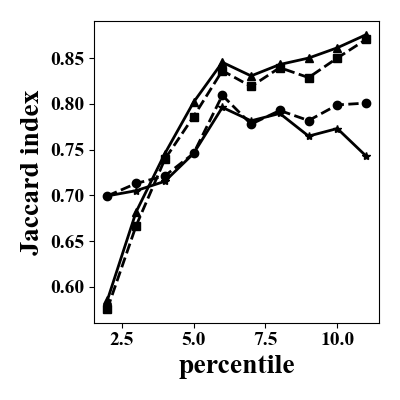

In [30]:
plt.figure(figsize=(4,4))
plt.plot(prctiles, jac_ind_ds_lpca, '-k^', label='DS + LPCA', linewidth=2)
plt.plot(prctiles, jac_ind_ds, '-k*', label='DS', linewidth=2)
plt.plot(prctiles, jac_ind_bs_lpca, '--ks', label='Standard + LPCA', linewidth=2)
plt.plot(prctiles, jac_ind_bs, '--ko', label='Standard', linewidth=2)
plt.xlabel('percentile', fontsize=20)
plt.ylabel('Jaccard index', fontsize=20)
plt.tight_layout()
#plt.legend(framealpha=0)
plt.savefig(ex_name + '_result_1.pdf', dpi=400)

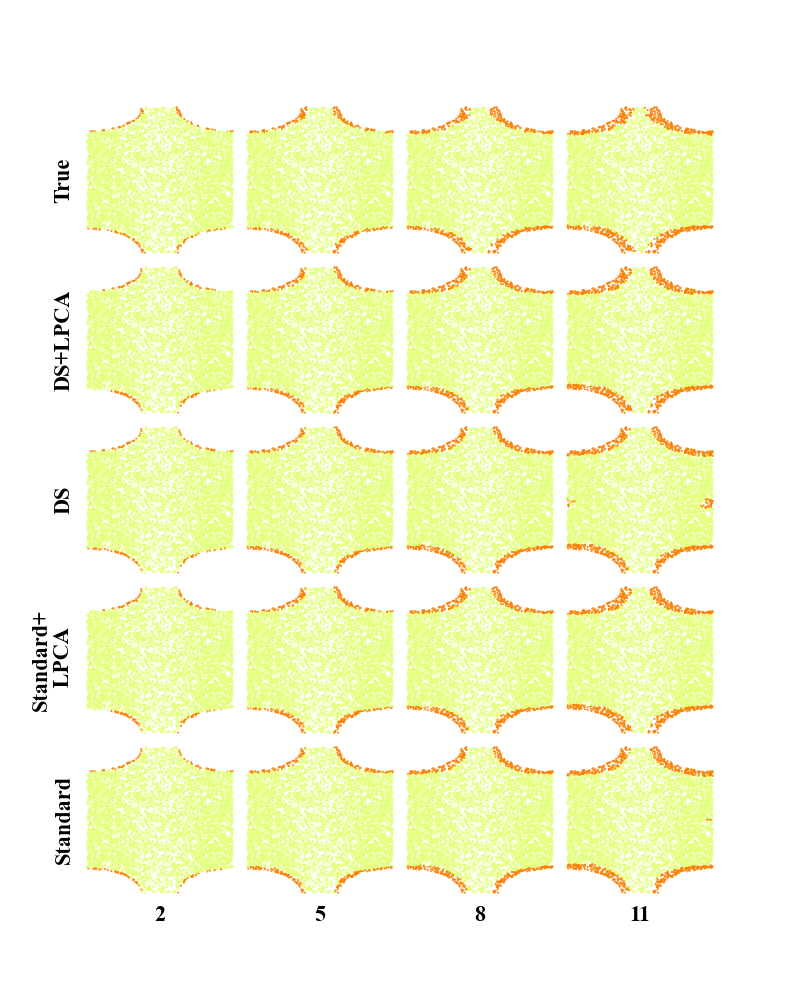

In [31]:
prctiles_ = [prctiles[0]] + prctiles[3:-3:3].tolist() + [prctiles[-1]]
bx_estimates = [
    ddX,
    bx_ds_lpca,
    bx_ds,
    bx_berry_sauer_w_lpca,
    bx_berry_sauer
]
ylabels = ['True', 'DS+LPCA', 'DS', 'Standard+\n LPCA', 'Standard']

fig_h = 2
cmap = 'Wistia'
n_bx_estimates = len(bx_estimates)
n_percentiles = len(prctiles_)
fig, ax = plt.subplots(n_bx_estimates, n_percentiles, figsize=(n_percentiles*fig_h,n_bx_estimates*fig_h))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0, hspace=0)
for i in range(n_bx_estimates):
    for j in range(n_percentiles):
        thresh = np.percentile(bx_estimates[i], prctiles_[j])
        ax[i,j].scatter(*labelsMat0.T, c=bx_estimates[i]<=thresh, cmap=cmap, s=1)
        if j == 0:
            ax[i,j].set_ylabel(ylabels[i])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].spines[['left', 'right', 'top', 'bottom']].set_visible(False)

for j in range(n_percentiles):
    ax[-1,j].set_xlabel(str(prctiles_[j]))

plt.savefig(ex_name + '_result_2.pdf', dpi=400)

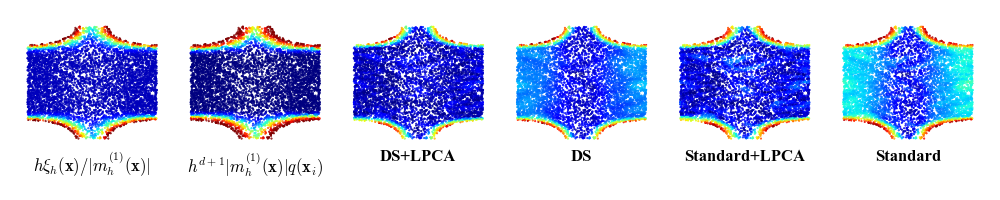

In [33]:
nu_norm_true1 = -opts['h']*bx_util.compute_xi(ddX, opts['h'])/(bx_util.compute_m1(ddX, opts['h'])+1e-12)
nu_norm_true2 = -(opts['h']**(opts['d']+1))*bx_util.compute_m1(ddX, opts['h'])
nu_norm_estimates = [
    nu_norm_true1,
    nu_norm_true2,
    nu_norm_ds_lpca,
    nu_norm_ds,
    nu_norm_berry_sauer_w_lpca,
    nu_norm_berry_sauer
]
# xlabels = ['$h\\xi_h(\\mathbf{x})/|m_{h}^{(1)}(\\mathbf{x})|$', '$h^{d+1}|m_h^{(1)}(\\mathbf{x})|q(\\mathbf{x}_i)$',
#            '$\\left\\|\\boldsymbol{\\nu}_i\\right\\|$', '$\\left\\|\\boldsymbol{\\nu}_i\\right\\|_2$ w/o local PCA',
#            '$\\left\\|\\boldsymbol{\\mu}_i\\right\\|$ with local PCA', '$\\left\\|\\boldsymbol{\\mu}_i\\right\\|$']

xlabels = ['$h\\xi_h(\\mathbf{x})/|m_{h}^{(1)}(\\mathbf{x})|$', '$h^{d+1}|m_h^{(1)}(\\mathbf{x})|q(\\mathbf{x}_i)$',
           'DS+LPCA', 'DS',
           'Standard+LPCA', 'Standard']
fig_h = 2
cmap = 'Wistia'
n_estimates = len(nu_norm_estimates)
fig, ax = plt.subplots(1, n_estimates, figsize=(n_bx_estimates*fig_h, fig_h))
plt.subplots_adjust(left=0, bottom=0, right=0.1, top=0.1, wspace=0, hspace=0)
for i in range(n_estimates):
    ax[i].scatter(*labelsMat0.T, c=nu_norm_estimates[i], cmap='jet', s=1)
    ax[i].set_xlabel(xlabels[i], fontsize=12)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines[['left', 'right', 'top', 'bottom']].set_visible(False)
    #ax[i].axis('image')
plt.tight_layout()
plt.savefig(ex_name + '_result_4.pdf', dpi=400)